In [1]:
import os

In [2]:
os.environ['R_HOME'] = 'C:/Users/omkar.joglekar/Anaconda3/Lib/R-4.3.1' #path to your R installation

In [3]:
#To import rpy2 objects
from rpy2.robjects import packages, StrVector, IntVector, ListVector, r
from rpy2.robjects.packages import importr

import pandas as pd

#Import GeoLift, GeoLiftPlot and Convert functions
from utils import GeoLiftData, GeoLift, GeoLiftPlot, ConvertDf

C:\Users\omkar.joglekar\Anaconda3\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [4]:
pd_GeoLift_PreTest = pd.read_csv("test_data_set_1.csv")
pd_GeoLift_PreTest.head()

,CITY,Y,LEAD_CREATED_DATE
0,Abbotsford,9,2023-06-01
1,Barrie,19,2023-06-01
2,Brampton,83,2023-06-01
3,Brantford,22,2023-06-01
4,Burnaby,10,2023-06-01


In [5]:
GeoLift_PreTest = ConvertDf(pd_GeoLift_PreTest, conv_type = "ToR")

print(GeoLift_PreTest.head())

        CITY   Y LEAD_CREATED_DATE
0 Abbotsford   9        2023-06-01
1     Barrie  19        2023-06-01
2   Brampton  83        2023-06-01
3  Brantford  22        2023-06-01
4    Burnaby  10        2023-06-01
5    Calgary 140        2023-06-01



In [6]:
GeoTestData_PreTest = GeoLift.GeoDataRead(data = GeoLift_PreTest,
                                          date_id = "LEAD_CREATED_DATE",
                                          location_id = "CITY",
                                          Y_id = "Y",
                                          X = StrVector([]), #empty list as we have no covariates
                                          format = "yyyy-mm-dd",
                                          summary = True)

R[write to console]: ##################################
#####       Summary       #####
##################################

* Raw Number of Locations: 46
* Time Periods: 92
* Final Number of Locations (Complete): 43



In [7]:
pd_GeoTestData_PreTest = ConvertDf(GeoTestData_PreTest, conv_type = "ToPandas")

pd_GeoTestData_PreTest.head()

,location,time,Y
1,abbotsford,1,9
2,abbotsford,2,10
3,abbotsford,3,10
4,abbotsford,4,11
5,abbotsford,5,12


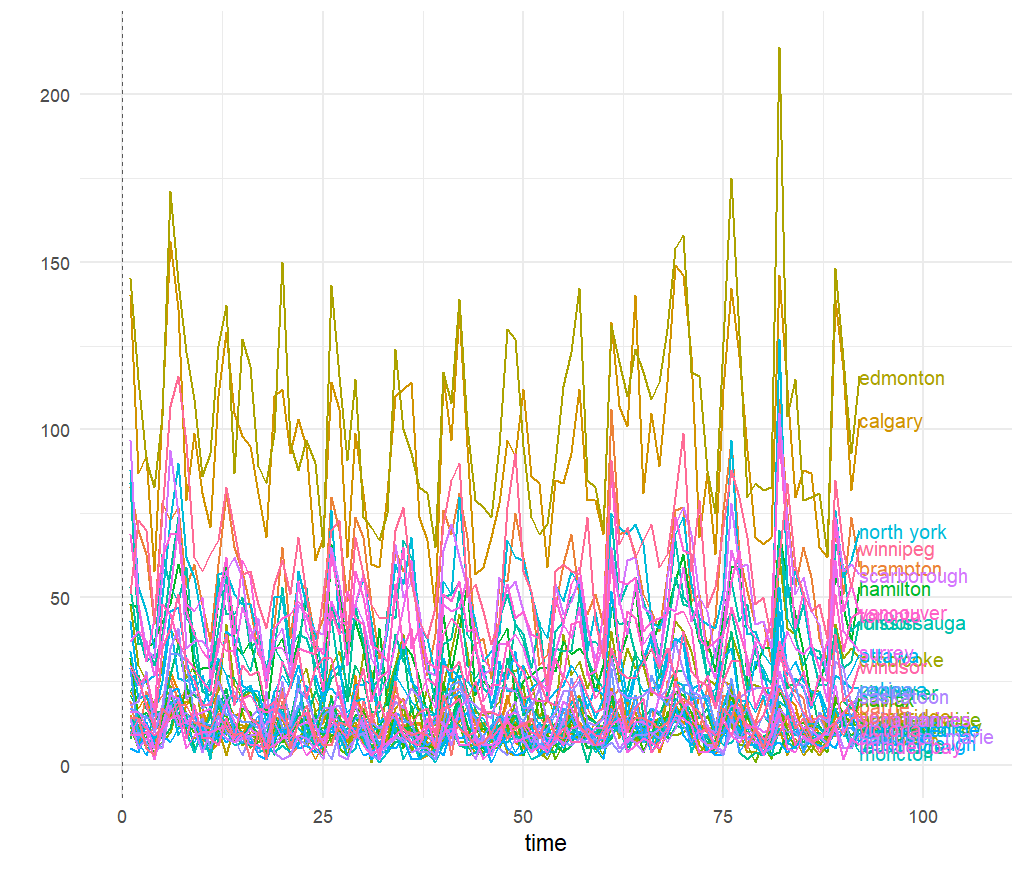

In [8]:
GeoLiftPlot(func = GeoLift.GeoPlot,
            data = GeoTestData_PreTest,
            Y_id = "Y",
            time_id = "time",
            location_id = "location")

In [9]:
MarketSelections = GeoLift.GeoLiftMarketSelection(data = GeoTestData_PreTest,
                                                  treatment_periods = IntVector([10,15]),
                                                  N = IntVector([2, 3, 4, 5]),
                                                  Y_id = "Y",
                                                  location_id = "location",
                                                  time_id = "time",
                                                  effect_size = r.seq(0, 0.5, 0.05),
                                                  lookback_window = 1, 
                                                  include_markets = StrVector(['edmonton']),
                                                  holdout = IntVector([0.5,1]),
                                                  cpic = 1.0,
                                                  budget = 100000,
                                                  alpha = 0.1,
                                                  Correlations = True,
                                                  fixed_effects = True,
                                                  side_of_test = "two_sided")

R[write to console]: Setting up cluster.

R[write to console]: Importing functions into cluster.

R[write to console]: Attempting to load the environment 'package:dplyr'

R[write to console]: 
Attaching package: 'dplyr'


R[write to console]: The following objects are masked from 'package:stats':

    filter, lag


R[write to console]: The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


R[write to console]: Calculating which the best treatment groups are.

R[write to console]: 
Deterministic setup with 2 locations in treatment.

R[write to console]: 
Deterministic setup with 3 locations in treatment.

R[write to console]: 
Deterministic setup with 4 locations in treatment.

R[write to console]: 
Deterministic setup with 5 locations in treatment.



  ID                                            location duration EffectSize
1  1                      brampton, edmonton, north york       15       0.05
2  2                                edmonton, north york       15       0.05
3  3 brampton, brantford, calgary, edmonton, scarborough       15       0.15
4  4 calgary, chilliwack, edmonton, scarborough, toronto       15       0.15
5  5              calgary, edmonton, oshawa, scarborough       15       0.15
6  6                      calgary, edmonton, scarborough       15       0.15
  Power AvgScaledL2Imbalance Investment    AvgATT Average_MDE ProportionTotal_Y
1     1            0.5076593     158.95  3.662433  0.05193892         0.2019047
2     1            0.5452693     116.40  3.752988  0.04828422         0.1486311
3     1            0.5368207     721.35  9.635839  0.15032003         0.3019828
4     1            0.5635742     688.50  9.165916  0.14973540         0.2887262
5     1            0.5947281     611.70 10.166220  0.14951325

In [12]:
MarketSelections_BestMarkets = ConvertDf(MarketSelections[0], conv_type = "ToPandas")

MarketSelections_BestMarkets.head()

,ID,location,duration,EffectSize,Power,AvgScaledL2Imbalance,Investment,AvgATT,Average_MDE,ProportionTotal_Y,abs_lift_in_zero,Holdout,rank,correlation
1,1,"brampton, edmonton, north york",15.0,0.05,1.0,0.507659,1192.125,3.662433,0.051939,0.201905,0.002,0.798095,1,0.931372
2,2,"edmonton, north york",15.0,0.05,1.0,0.545269,873.000,3.752988,0.048284,0.148631,0.002,0.851369,1,0.910388
3,3,"brampton, brantford, calgary, edmonton, scarbo...",15.0,0.15,1.0,0.536821,5410.125,9.635839,0.150320,0.301983,0.000,0.698017,3,0.954469
4,4,"calgary, chilliwack, edmonton, scarborough, to...",15.0,0.15,1.0,0.563574,5163.750,9.165916,0.149735,0.288726,0.000,0.711274,3,0.943945
5,5,"calgary, edmonton, oshawa, scarborough",15.0,0.15,1.0,0.594728,4587.750,10.166220,0.149513,0.256032,0.000,0.743968,3,0.942210


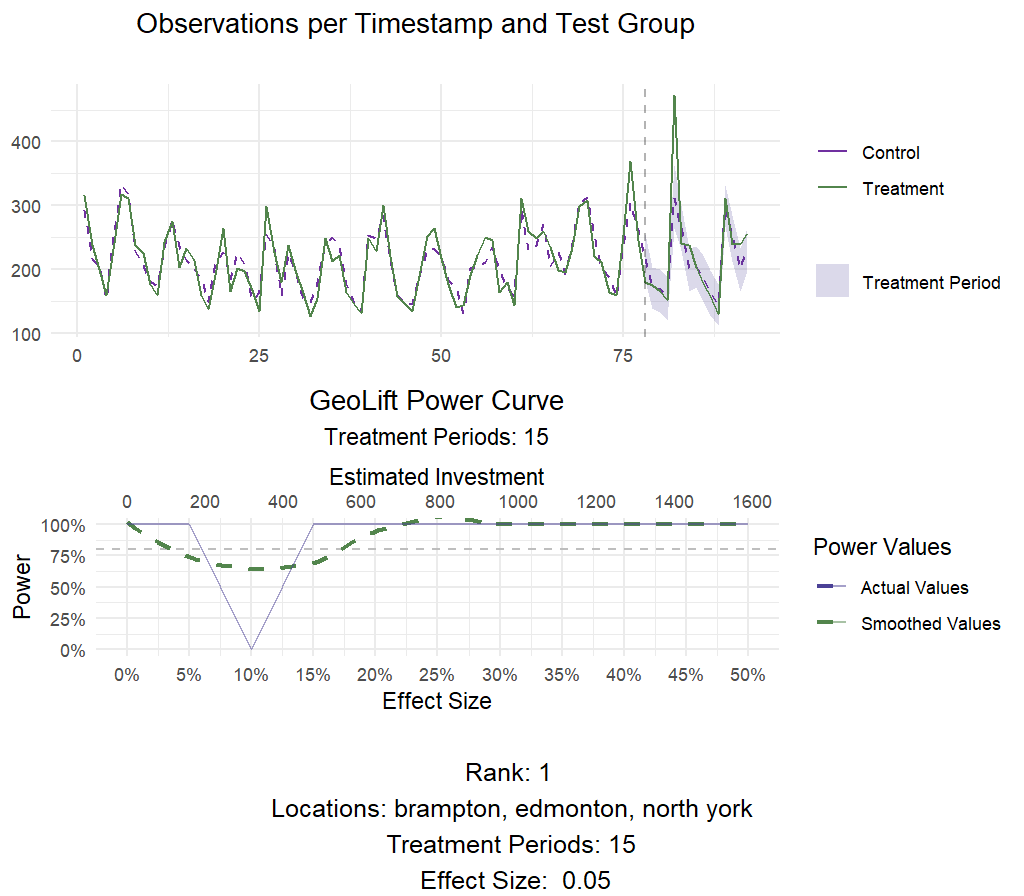

In [16]:
GeoLiftPlot(func = GeoLift.plot_GeoLiftMarketSelection,
            x = MarketSelections,
            market_ID = 1, 
            print_summary = False)

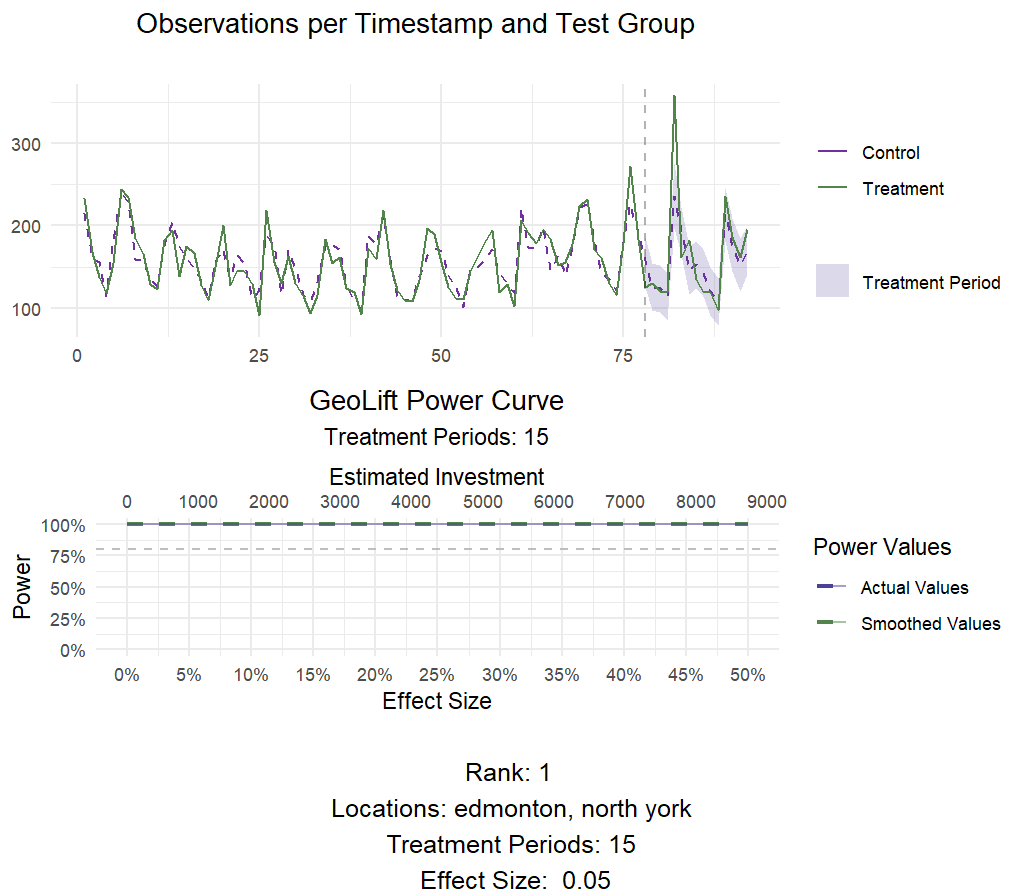

In [14]:
GeoLiftPlot(func = GeoLift.plot_GeoLiftMarketSelection,
            x = MarketSelections,
            market_ID = 2, 
            print_summary = False)

In [10]:
power_data = GeoLift.GeoLiftPower(data = GeoTestData_PreTest,
                                    locations = StrVector(['edmonton', 'north york']),
                                    effect_size = r.seq(-0.25, 0.25, 0.01),
                                    lookback_window = 10,
                                    treatment_periods = 15,
                                    cpic = 7.5,
                                    side_of_test = "two_sided")

R[write to console]: Setting up cluster.

R[write to console]: Importing functions into cluster.

R[write to console]: Calculating Power for the following treatment group: edmonton; north york.



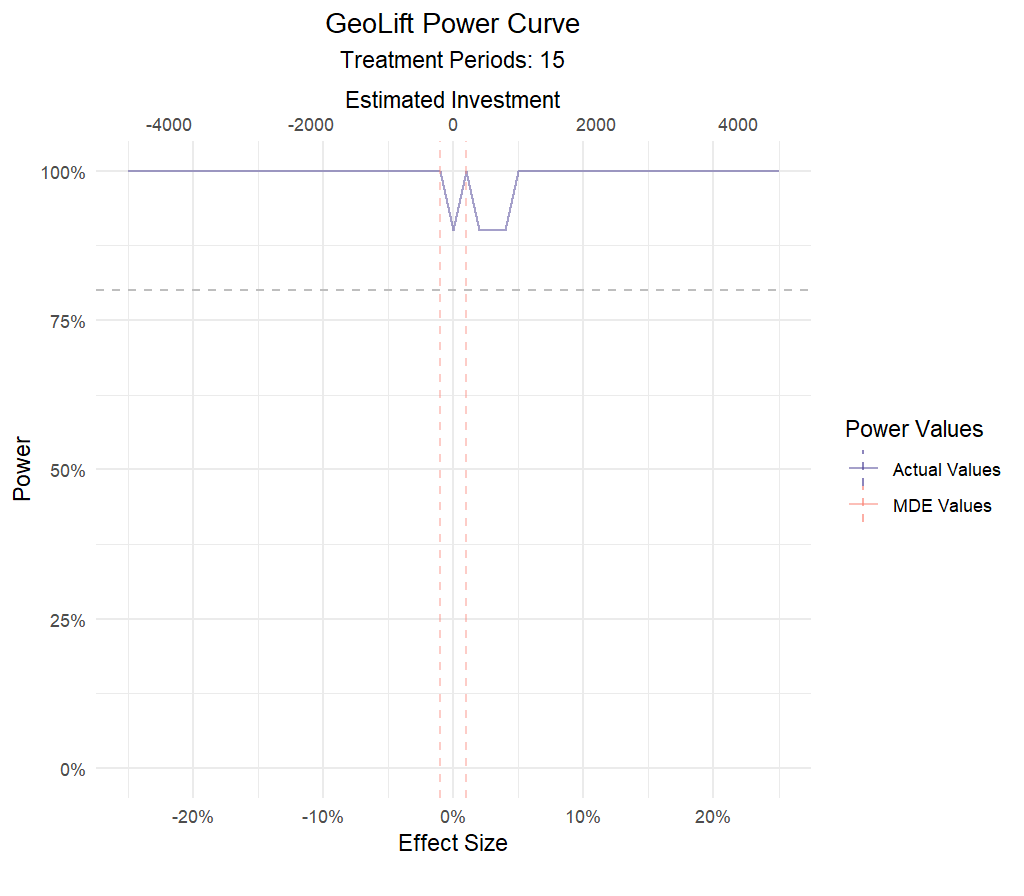

In [11]:
GeoLiftPlot(func = GeoLift.plot_GeoLiftPower,
            x = power_data, 
            show_mde = True, 
            smoothed_values = False, 
            breaks_x_axis = 5)    

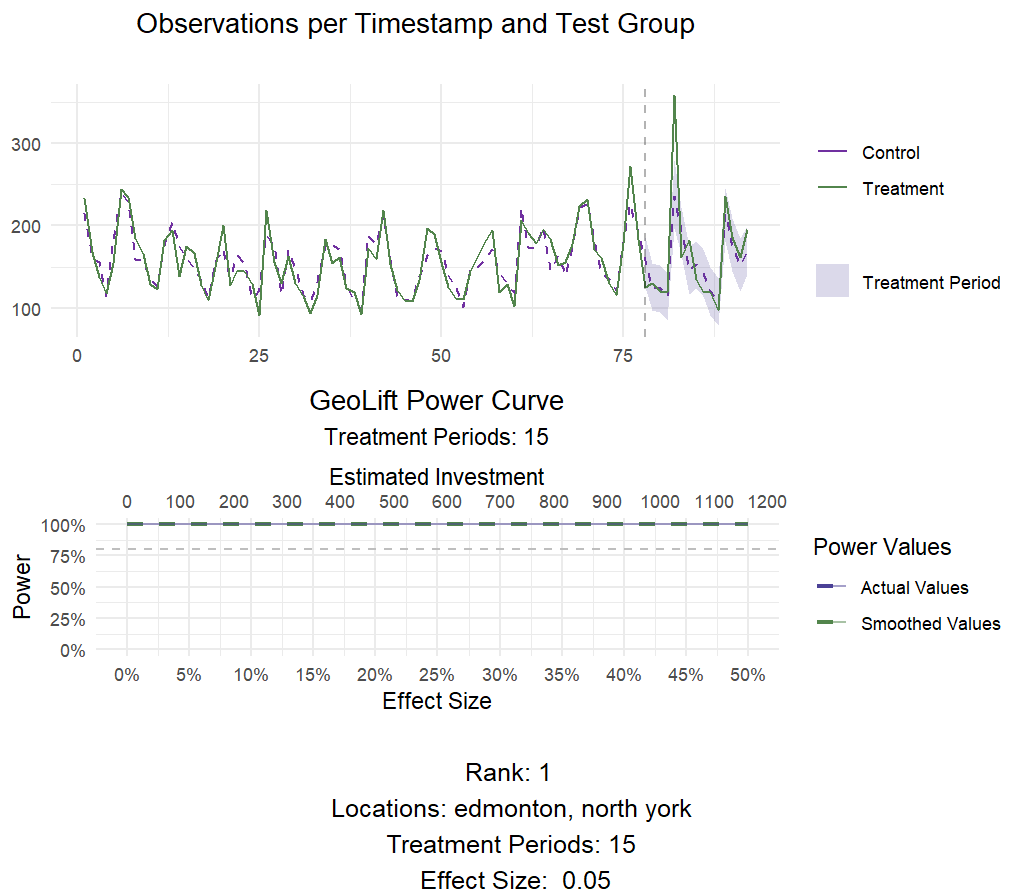

In [12]:
# Plot for edmonton and n york for a 15 day test
GeoLiftPlot(func = GeoLift.plot_GeoLiftMarketSelection,
            x = MarketSelections,
            market_ID = 2, 
            print_summary = False)